In [1]:
pathtorepo = "C:\\Users\\Alex\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie, JLD

In [6]:
cd("C:\\Users\\Alex\\Desktop\\saved_files\\clear output\\k 0.01\\to 0")

In [10]:
cd("C:\\Users\\Alex\\YandexDisk\\Science\\HR\\bifurcation dia\\electrical link 0.01\\to 0")

In [11]:
x_sum = load("x_sum.jld")["data"]
LSE = load("LSE_electrical.jld")["data"];
u0s = load("u0_electrical.jld")["data"];

In [12]:
start_p = 0.025
finish_p = 0.00
p_range = range(start_p, finish_p, length = 5000)

start_chem= 0.025 # 0.000 # Стартовое значение параметра
finish_chem = 0.00 # Конечное значение параметра
len_chem = 5000 #  Длина интервала параметра
range_chem = range(start_chem, finish_chem, length = len_chem  ) # Интервал параметра

0.025:-5.001000200040008e-6:0.0

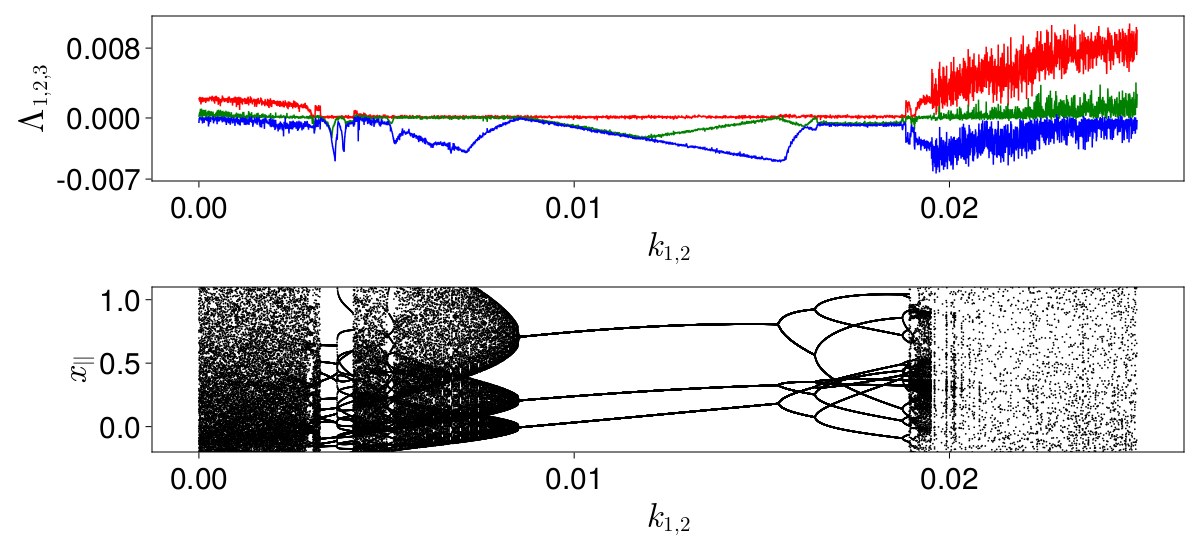

In [23]:
labelsize = 35
ticksize = 30

f = Figure(resolution = (1200, 550))
axis1 = Axis(f[1, 1],
    xlabel = L"k_{1,2}", ylabel = L"Λ_{1,2,3}",
    xlabelsize = labelsize, ylabelsize = labelsize,
    xticklabelsize = ticksize, yticklabelsize = ticksize, yticks = [-0.007, 0.000, 0.008], xgridvisible = false, ygridvisible = false)
axis2 = Axis(f[2, 1],
    xlabel = L"k_{1,2}", ylabel = L"x_{||}",
    xlabelsize = labelsize, ylabelsize = labelsize,
    xticklabelsize = ticksize, yticklabelsize = ticksize, xgridvisible = false, ygridvisible = false)

lines!(axis1, p_range[:], LSE[:, 1], color = :red, linewidth = 1.5)
lines!(axis1, p_range[:], LSE[:, 2], color = :green, linewidth = 1.5)
lines!(axis1, p_range[:], LSE[:, 3], color = :blue, linewidth = 1.5)

for (j, p) in enumerate(range_chem)
    scatter!(axis2, fill(p, length(x_sum[j])), x_sum[j]; color = ("black", 1.0), markersize = 2.5)
end

ylims!(axis2, -0.2, 1.1)

f

In [24]:
save("2x2_LSE_BF2.eps", f)

CairoMakie.Screen{EPS}


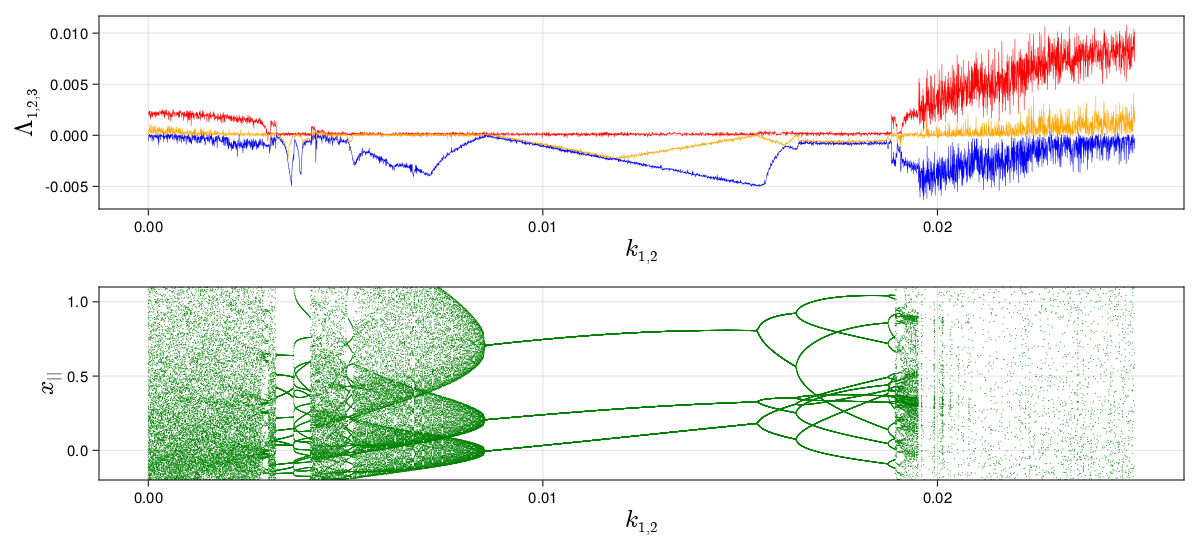

In [12]:
f = Figure(resolution = (1200, 550))
axis1 = Axis(f[1, 1],
    xlabel = L"k_{1,2}", ylabel = L"Λ_{1,2,3}",
    xlabelsize = 25, ylabelsize = 25,
    xticklabelsize = 15, yticklabelsize = 15)
axis2 = Axis(f[2, 1],
    xlabel = L"k_{1,2}", ylabel = L"x_{||}",
    xlabelsize = 25, ylabelsize = 25,
    xticklabelsize = 15, yticklabelsize = 15)

lines!(axis1, p_range[:], LSE[:, 1], color = :red, linewidth = 0.5)
lines!(axis1, p_range[:], LSE[:, 2], color = :green, linewidth = 0.5)
lines!(axis1, p_range[:], LSE[:, 3], color = :blue, linewidth = 0.5)
for (j, p) in enumerate(range_chem)
    scatter!(axis2, fill(p, length(x_sum[j])), x_sum[j]; color = ("black", 1.0), markersize = 1.0)
end

ylims!(axis2, -0.2, 1.1)
f